In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

amir_deals = pd.read_csv("amir_deals.csv", index_col=0)

print(amir_deals.head())

     product   client status   amount  num_users
1  Product F  Current    Won  7389.52         19
2  Product C      New    Won  4493.01         43
3  Product B      New    Won  5738.09         87
4  Product I  Current    Won  2591.24         83
5  Product E  Current    Won  6622.97         17


# Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

Both pandas as pd and matplotlib.pyplot as plt are loaded and amir_deals is available.

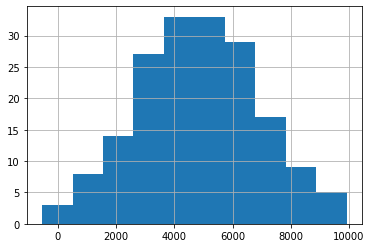

In [6]:
# Histogram of amount with 10 bins and show plot
amir_deals["amount"].hist(bins=10)
plt.show()

## Question

Which probability distribution do the sales amounts most closely follow?

## ANSWER:
* Normal.

## Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

norm from scipy.stats is imported as well as pandas as pd. The DataFrame amir_deals is loaded.

## Instructions 1/4

1. What's the probability of Amir closing a deal worth less than $7500?

2. What's the probability of Amir closing a deal worth more than $1000?

3. What's the probability of Amir closing a deal worth between $3000 and $7000?

4. What amount will 25% of Amir's sales be less than?

In [9]:
# Probability of deal < 7500
# prob_less_7500 = norm.cdf(Prob,mean,std)
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


In [10]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


In [11]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [12]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


````
Nifty normal distribution usage! You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.
````

# Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

In addition, norm from scipy.stats, pandas as pd, and matplotlib.pyplot as plt are loaded.

## Instructions

* Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
* Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
* Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
* Plot the distribution of the new_sales amounts using a histogram and show the plot.

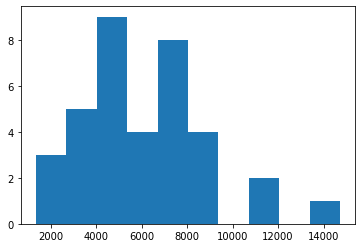

In [13]:
# Calculate new average amount
new_mean = 5000*1.20

# Calculate new standard deviation
new_sd = 2000*1.30

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size= 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

# Which market is better?
The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

norm from scipy.stats is imported.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

## ANSWER:

* Amir performs about equally in both markets.

In [15]:
print(1-norm.cdf(1000, 5000, 2000))
print(1-norm.cdf(1000, 6000, 2600))

0.9772498680518208
0.9727648049862613


````
Great work! In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.
````

# Visualizing sampling distributions
On the right, try creating sampling distributions of different summary statistics from samples of different distributions. Which distribution does the central limit theorem not apply to?

* Discrete uniform distribution
* Continuous uniform distribution
* Binomial distribution
* All of the above
* None of the above

## ANSWER:
* * None of the above

# The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded and amir_deals is available.

In [ ]:
# Create a histogram of num_users and show
amir_deals["num_users"].hist()
plt.show()

In [ ]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

# The mean of means
You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

amir_deals is available and the user data for all the company's deals is available in all_deals. Both pandas as pd and numpy as np are loaded.

## Instructions

* Set the random seed to 321.
* Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
* Print the mean of sample_means.
* Print the mean of the num_users column of amir_deals.

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

# Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

Instructions

* Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.
* Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?
* What's the probability that Amir responds to 2 or fewer leads in a day?
* What's the probability that Amir responds to more than 10 leads in a day?

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

````
Perfect Poisson probabilities! Note that if you provide poisson.pmf() or poisson.cdf() with a non-integer, it throws an error since the Poisson distribution only applies to integers.
````

# Distribution dragging and dropping
By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.

* Poisson:

    * Number of customers that enter a store each hour.
    * Number of products sold each week. 

* Exponential:
    * Amount of time until someone pays off their loan. 
    * Amount of time until the next customer makes a purchase.

* Binomial:
    * number of people from a group of 30 that pass their driving test. 


# Modeling time between leads

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

## Instructions

* Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?
* What's the probability it takes Amir more than 4 hours to respond to a lead?
* What's the probability it takes Amir 3-4 hours to respond to a lead?

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1- expon.cdf(4, scale=2.5))

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

# The t-distribution
Which statement is not true regarding the t-distribution?

## Possible Answers

The t-distribution has thicker tails than the normal distribution.

* A t-distribution with high degrees of freedom resembles the normal distribution.
* The number of degrees of freedom affects the distribution's variance.
* The t-distribution is skewed.

## ANSWER:

* The t-distribution is skewed.

````
The t-distribution is not skewed, just like the normal distribution, but it does have thicker tails and higher variance than the normal distribution.
````
